# Zaawansowane metody detekcji outlierow

Zbiór danych do analizy: https://www.kaggle.com/datasets/clemencetravers/predict-mc-donalds-stock-price

Mamy dane dotyczące wskaźników giełdowych, na podstawie których mamy zaprognozować, czy cena akcji wzrośnie czy zmaleje.

Zmienne:
- S&P500
- Dow Jones
- Wendy's Index
- Yum's index (Taco Bell, Pizza Hut etc.)
- Starbuck's index
- Coca's index
- Wheat index: Chicago SRW Wheat Future (ZW=F)
- Oil index: Crude oil (CL=F)
- Commodity: United State Commodity Index
- Sugar: (SB=F)
- Volatility: VXD index
- War: War in Ukraine 0 : no war, 1: war (the 20/02/2022)

In [1]:
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import  MinMaxScaler

In [2]:
# puść ten kod, 
# jeżeli wywołujesz plik  w folderze rozwiąznaia, 
# a ramka danych znajduje się w folderze data
import os 
os.chdir('../')

In [3]:
# Pobranie danych
df = pd.read_csv("data/stock_price.csv",sep=';',decimal=',')

## Isolation Forest

In [3]:
# Definicja obiektu
iso_forest = IsolationForest(bootstrap=True)


In [4]:
# fit
iso_forest.fit(df)

IsolationForest(bootstrap=True)

In [5]:
# predykcja outlierow - możemy zrobić to też na innych/nowych danych.
is_outlier = iso_forest.predict(df)

In [6]:
iso_forest.score_samples(df)

array([-0.41580224, -0.44364293, -0.46309932, ..., -0.3844524 ,
       -0.39715418, -0.39778366])

In [7]:
# Dodanie do ramki
df['outlier_iso'] = is_outlier

In [8]:
# 1 - standardowa zmienna, -1 - outlier
df['outlier_iso'].value_counts()

outlier_iso
 1    1154
-1     103
Name: count, dtype: int64

In [9]:
# Statystyki w grupach
df.groupby('outlier_iso').describe()['Wendy']

,count,mean,std,min,25%,50%,75%,max
outlier_iso,,,,,,,,
-1,103.0,-0.003773,0.074483,-0.2886,-0.027150,-0.0042,0.025500,0.4270
1,1154.0,0.000760,0.017985,-0.1268,-0.008475,0.0005,0.009475,0.2585


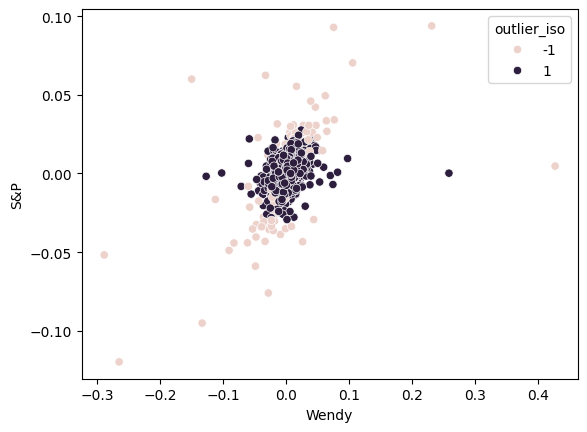

In [10]:
# Graficzna ocena outlierów
sns.scatterplot(data = df[['Wendy','S&P','outlier_iso']], x='Wendy',y='S&P',hue = 'outlier_iso')
plt.show()

## Local outlier factor

In [11]:
# Normalizacja
mms = MinMaxScaler().fit_transform(df)


In [12]:
# Stworzenie ramki danych
mms_df = pd.DataFrame(mms,columns = df.columns)

In [13]:
# Estymacja outlierów
lof = LocalOutlierFactor(n_neighbors=10).fit_predict(mms_df)

In [14]:
lof

array([1, 1, 1, ..., 1, 1, 1])

In [15]:
df['outlier_lof'] = lof

In [16]:
df['outlier_lof'].value_counts()

outlier_lof
 1    1204
-1      53
Name: count, dtype: int64

In [19]:
df.groupby(['outlier_iso','outlier_lof']).count()['S&P']

outlier_iso  outlier_lof
-1           -1                7
              1               96
 1           -1               46
              1             1108
Name: S&P, dtype: int64

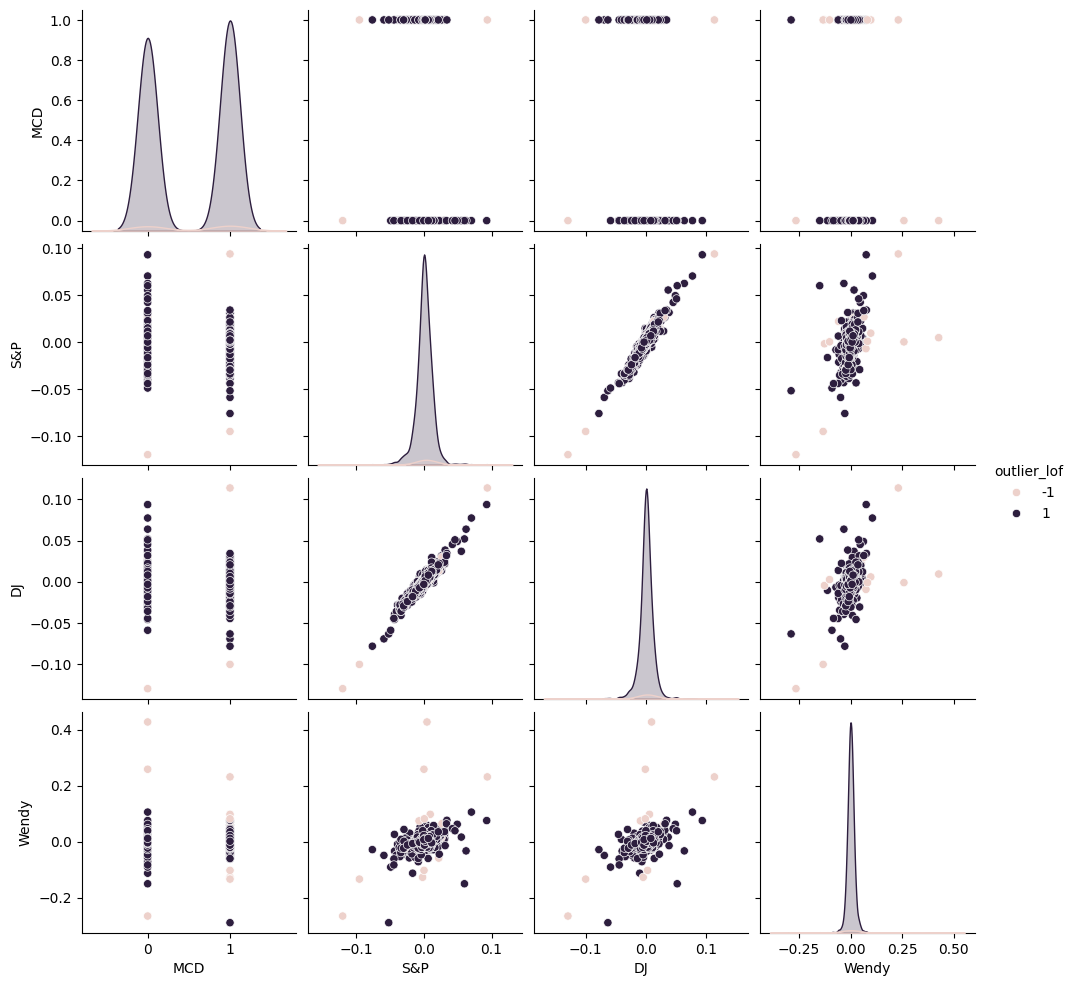

In [27]:
# pairplot
sns.pairplot(data=df[list(df.columns[:4]) + ['outlier_lof']],hue='outlier_lof')